In [199]:
import pandas as pd

In [201]:
import pandas as pd

df = pd.read_csv('Downloads/hocco_sales_data_23 1.csv')

# Group by 'itemid' and count the number of occurrences
item_counts = df['itemid'].value_counts()

print(item_counts)


itemid
SFG648     701
R00513     700
SFG152     698
A00123     697
R00526     697
          ... 
SFG588       1
SFG374       1
SFG370       1
SFG373       1
RMD0651      1
Name: count, Length: 1112, dtype: int64


In [203]:

filtered_df = df[df['itemid'] == 'SFG648']


print(filtered_df)

filtered_df.to_csv('SFG648_file.csv', index=False)

        itemid   orderdate   qty  amount
60      SFG648  01-01-2022  32.0  3264.0
188     SFG648  02-01-2022  36.0  3623.0
228     SFG648  03-01-2022  47.0  4769.5
437     SFG648  04-01-2022  16.0  1607.5
547     SFG648  05-01-2022  22.0  2244.0
...        ...         ...   ...     ...
108533  SFG648  27-12-2023  17.0  2499.0
108843  SFG648  28-12-2023  60.0  8820.0
109377  SFG648  29-12-2023  28.0  4116.0
109594  SFG648  30-12-2023  32.0  4704.0
109705  SFG648  31-12-2023  58.0  8526.0

[701 rows x 4 columns]


In [205]:
df = pd.read_csv('Downloads/SFG648_file.csv')

# Convert 'orderdate' to datetime format and set it as index
df['orderdate'] = pd.to_datetime(df['orderdate'], format = "%d-%m-%Y")
df.set_index('orderdate', inplace=True)

df.head()


,itemid,qty,amount
orderdate,,,
2022-01-01,SFG648,32.0,3264.0
2022-01-02,SFG648,36.0,3623.0
2022-01-03,SFG648,47.0,4769.5
2022-01-04,SFG648,16.0,1607.5
2022-01-05,SFG648,22.0,2244.0


In [207]:
# Resample the data to daily frequency and sum the 'amount'
daily_data = df['amount'].resample('D').sum()

# Print the first few rows to verify
daily_data.head()

orderdate
2022-01-01    3264.0
2022-01-02    3623.0
2022-01-03    4769.5
2022-01-04    1607.5
2022-01-05    2244.0
Freq: D, Name: amount, dtype: float64

## prediction for december2023

In [210]:
# Split data into training and test sets
train_data = daily_data[:'2023-11-30']
test_data = daily_data['2023-12-01':'2023-12-31']


In [223]:
from pmdarima import auto_arima

# Find the best ARIMA model parameters on the training data
model = auto_arima(train_data, seasonal=False, trace=True, 
                    error_action='ignore', suppress_warnings=True)
"""model = auto_arima(train_data, start_p = 1, start_q = 1, 
                          max_p = 5, max_q = 5, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, max_D= 5,trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
"""
# Print the summary of the model to see the selected parameters
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13458.906, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13234.214, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13456.907, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13011.345, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=12880.490, Time=0.29 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=12875.363, Time=0.35 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=12869.412, Time=0.35 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=12758.137, Time=1.06 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=12763.513, Time=0.99 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=12777.313, Time=1.73 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=12758.600, Time=0.57 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0] 

In [337]:
import statsmodels.api as sm

# Get the order of the ARIMA model from auto_arima
order = (5,1,6)

# Fit the ARIMA model with the optimal parameters
arima_model = sm.tsa.ARIMA(train_data, order=order)
fitted_model = arima_model.fit()

# Print the model summary to check the fit
print(fitted_model.summary())


C:\Users\Vishwa.Pujara\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                  699
Model:                 ARIMA(5, 1, 6)   Log Likelihood               -6173.578
Date:                Fri, 23 Aug 2024   AIC                          12371.157
Time:                        10:24:22   BIC                          12425.735
Sample:                    01-01-2022   HQIC                         12392.257
                         - 11-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3936      0.272     -5.118      0.000      -1.927      -0.860
ar.L2         -0.8887      0.610     -1.457      0.145      -2.084       0.306
ar.L3          0.1349      0.759      0.178      0.8

C:\Users\Vishwa.Pujara\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [338]:
# Forecast for December 2023 (31 days from December 1, 2023)
forecast_steps = 31
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2023-12-01', periods=forecast_steps, freq='D')

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a DataFrame for the forecasted results
forecast_df = pd.DataFrame({
    'date': forecast_index,
    'forecast': forecast_values,
})

# Merge forecast results with actual test data
comparison_df = pd.merge(forecast_df, test_data.reset_index(), left_on='date', right_on='orderdate', how='left')
comparison_df.rename(columns={'amount': 'actual'}, inplace=True)

# Print the comparison results
print(comparison_df)




         date     forecast  orderdate  actual
0  2023-12-01  3216.420569 2023-12-01  3822.0
1  2023-12-02  3157.509242 2023-12-02  2940.0
2  2023-12-03  3185.509181 2023-12-03  2058.0
3  2023-12-04  7397.969505 2023-12-04  7791.0
4  2023-12-05  1544.133805 2023-12-05  2205.0
5  2023-12-06  2775.594150 2023-12-06  1911.0
6  2023-12-07  6805.765561 2023-12-07  6762.0
7  2023-12-08  3157.195055 2023-12-08  2205.0
8  2023-12-09  3073.197552 2023-12-09  2352.0
9  2023-12-10  3138.888004 2023-12-10  2646.0
10 2023-12-11  7335.136327 2023-12-11  3087.0
11 2023-12-12  1514.366383 2023-12-12   735.0
12 2023-12-13  2739.850491 2023-12-13  2205.0
13 2023-12-14  6759.788850 2023-12-14  5439.0
14 2023-12-15  3152.433382 2023-12-15  4116.0
15 2023-12-16  3035.610457 2023-12-16  2646.0
16 2023-12-17  3131.604782 2023-12-17  1470.0
17 2023-12-18  7305.995435 2023-12-18  8379.0
18 2023-12-19  1513.117421 2023-12-19  3675.0
19 2023-12-20  2728.313457 2023-12-20  1470.0
20 2023-12-21  6734.597187 2023-12

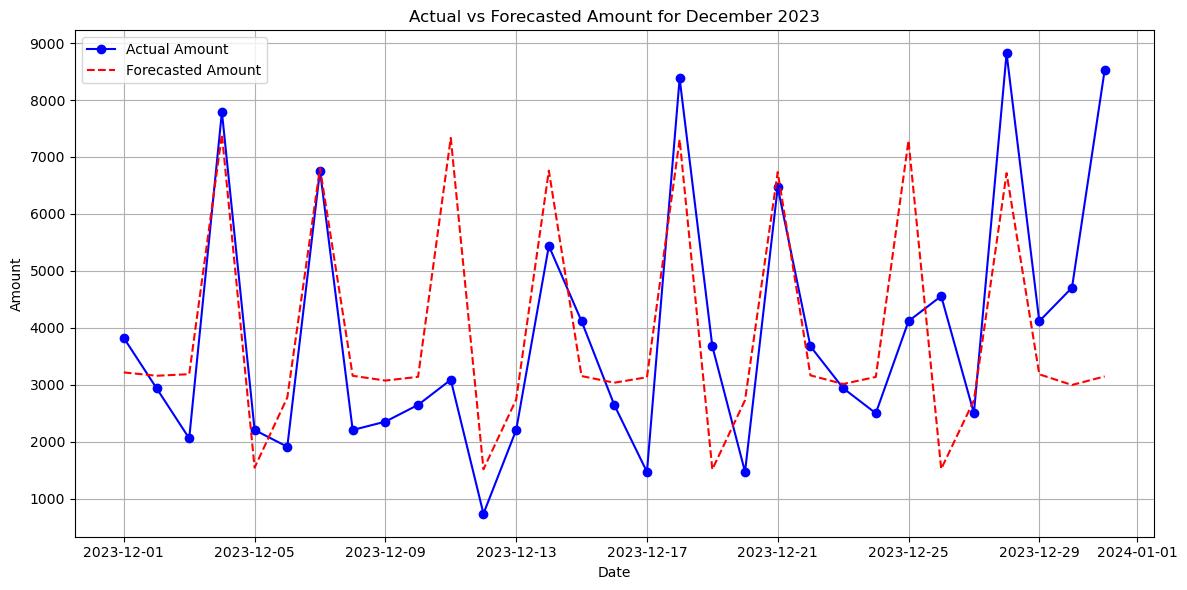

In [339]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'date' column to datetime format
comparison_df['date'] = pd.to_datetime(comparison_df['date'])

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(comparison_df['date'], comparison_df['actual'], label='Actual Amount', color='blue', marker='o')

# Plot forecasted values
plt.plot(comparison_df['date'], comparison_df['forecast'], label='Forecasted Amount', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Actual vs Forecasted Amount for December 2023')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [340]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual and forecasted values
actual_values = comparison_df['actual']
forecasted_values = comparison_df['forecast']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecasted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecasted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the accuracy metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1242.4643691498993
Mean Squared Error (MSE): 3027800.6423213463
Root Mean Squared Error (RMSE): 1740.0576548842703


## forecasting the data for january2024

In [173]:
# Split data into training set up to the end of December 2023
train_data = daily_data[:'2023-12-31']


In [174]:
from pmdarima import auto_arima

# Find the best ARIMA model parameters
model = auto_arima(train_data, seasonal=False, trace=True, 
                    error_action='ignore', suppress_warnings=True)

# Print the summary of the model to see the selected parameters
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14049.142, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13815.682, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14047.145, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13577.385, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=13441.263, Time=0.34 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=13435.553, Time=0.39 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=13427.822, Time=0.40 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=13318.219, Time=2.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.88 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=13340.367, Time=3.61 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=13318.978, Time=0.92 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0] interc

In [345]:
import statsmodels.api as sm

# Get the order of the ARIMA model from auto_arima
order = (5,1,6)

# Fit the ARIMA model with the optimal parameters
arima_model = sm.tsa.ARIMA(train_data, order=order)
fitted_model = arima_model.fit()

# Print the model summary to check the fit
print(fitted_model.summary())


C:\Users\Vishwa.Pujara\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                  699
Model:                 ARIMA(5, 1, 6)   Log Likelihood               -6173.578
Date:                Fri, 23 Aug 2024   AIC                          12371.157
Time:                        10:25:20   BIC                          12425.735
Sample:                    01-01-2022   HQIC                         12392.257
                         - 11-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3936      0.272     -5.118      0.000      -1.927      -0.860
ar.L2         -0.8887      0.610     -1.457      0.145      -2.084       0.306
ar.L3          0.1349      0.759      0.178      0.8

C:\Users\Vishwa.Pujara\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [346]:
# Forecast for the next month (31 days from January 1, 2024)
forecast_steps = 31
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2024-01-01', periods=forecast_steps, freq='D')

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a DataFrame for the forecasted results
forecast_df = pd.DataFrame({
    'date': forecast_index,
    'forecast': forecast_values,
})

# Print the forecasted results
print(forecast_df)


                 date     forecast
2023-12-01 2024-01-01  3216.420569
2023-12-02 2024-01-02  3157.509242
2023-12-03 2024-01-03  3185.509181
2023-12-04 2024-01-04  7397.969505
2023-12-05 2024-01-05  1544.133805
2023-12-06 2024-01-06  2775.594150
2023-12-07 2024-01-07  6805.765561
2023-12-08 2024-01-08  3157.195055
2023-12-09 2024-01-09  3073.197552
2023-12-10 2024-01-10  3138.888004
2023-12-11 2024-01-11  7335.136327
2023-12-12 2024-01-12  1514.366383
2023-12-13 2024-01-13  2739.850491
2023-12-14 2024-01-14  6759.788850
2023-12-15 2024-01-15  3152.433382
2023-12-16 2024-01-16  3035.610457
2023-12-17 2024-01-17  3131.604782
2023-12-18 2024-01-18  7305.995435
2023-12-19 2024-01-19  1513.117421
2023-12-20 2024-01-20  2728.313457
2023-12-21 2024-01-21  6734.597187
2023-12-22 2024-01-22  3164.972980
2023-12-23 2024-01-23  3013.155718
2023-12-24 2024-01-24  3136.810999
2023-12-25 2024-01-25  7287.723712
2023-12-26 2024-01-26  1520.988217
2023-12-27 2024-01-27  2724.496263
2023-12-28 2024-01-2

In [347]:
# Historical data for plotting
historical_data = daily_data

# Create a combined DataFrame for plotting
combined_df = pd.concat([
    pd.DataFrame({'date': historical_data.index, 'amount': historical_data.values}),
    forecast_df
], ignore_index=True)

# Print the combined data for verification
print(combined_df)

          date  amount     forecast
0   2022-01-01  3264.0          NaN
1   2022-01-02  3623.0          NaN
2   2022-01-03  4769.5          NaN
3   2022-01-04  1607.5          NaN
4   2022-01-05  2244.0          NaN
..         ...     ...          ...
756 2024-01-27     NaN  2724.496263
757 2024-01-28     NaN  6716.173777
758 2024-01-29     NaN  3182.904476
759 2024-01-30     NaN  2995.705780
760 2024-01-31     NaN  3145.902581

[761 rows x 3 columns]


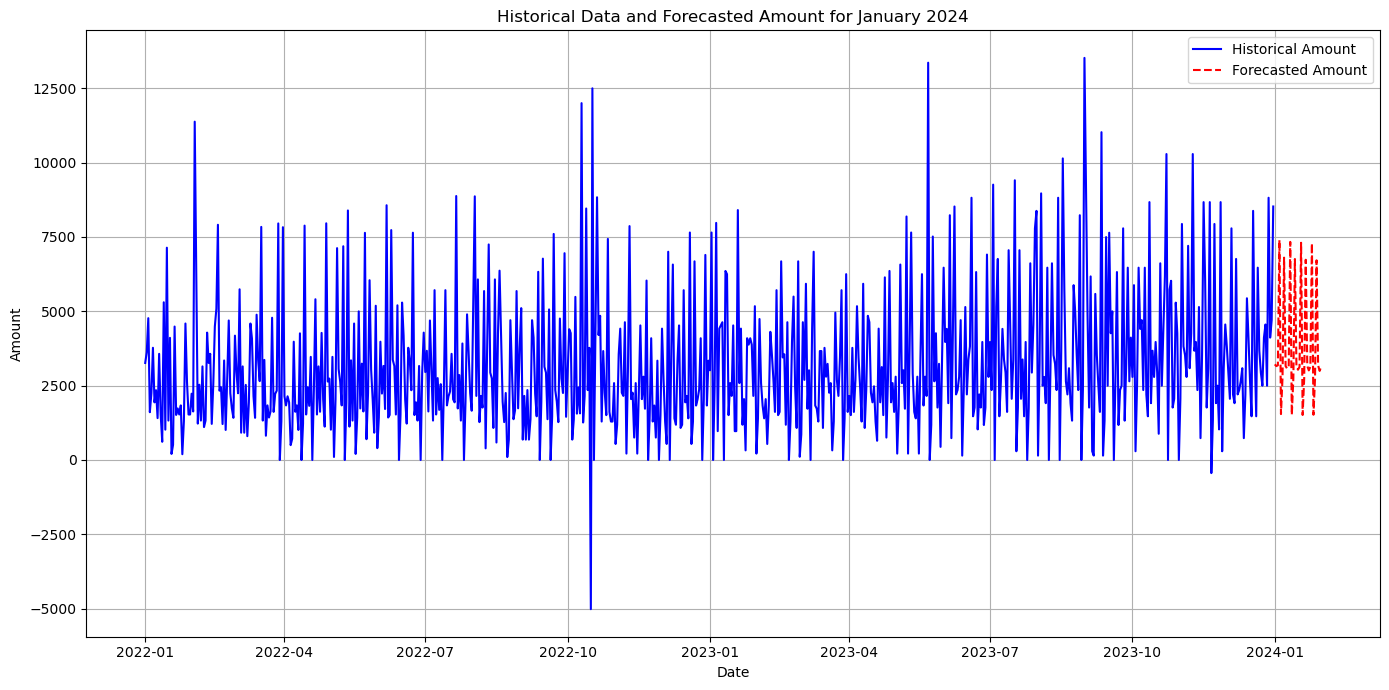

In [348]:
# Plot the historical and forecasted data
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(historical_data.index, historical_data, label='Historical Amount', color='blue')

# Plot forecasted data
plt.plot(forecast_df['date'], forecast_df['forecast'], label='Forecasted Amount', color='red', linestyle='--')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Historical Data and Forecasted Amount for January 2024')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
